# What is LOF?

LOF is an unsupervised ML algorithm that identifies outliers with respect to the local neighborhoods as opposed to using the entire data distribution.

The advantage of using an LOF is identifying points that are outliers relative to a local cluster of points.



# Basic idea of LOF: 


The local outlier factor is based on a concept of a local density, where locality is given by k nearest neighbors, whose distance is used to estimate the density. By comparing the local density of an object to the local densities of its neighbors, one can identify regions of similar density, and points that have a substantially lower density than their neighbors. These are considered to be outliers.
    
    
    
Comparing the local density of a point with the densities of its neighbors. A has a much lower density than its neighbors.


The local density is estimated by the typical distance at which a point can be "reached" from its neighbors and for that the "reachability distance" is used by LOF .

It is defined as the maximum of the distance between two points and the k-distance of that point. where k-distance(A) will be the distance of the object A to  its k-th nearest neighbor. 

Hence for points inside the circle the k-distance is considered and for points outside the cluster, the distance between points is considered.

Here reachability distances to all of the k-nearest neighbors of a point are calculated to determine the Local Reachability Density (LRD) of that point. 

The local reachability density is a measure of the density of k-nearest points around a point which is calculated by taking the inverse of the sum of all of the reachability distances of all the k-nearest neighboring points. 

Hence the closer the points are, the distance is lesser, and the density is more, hence here inverse is taken in the equation.





The calculation of Local outlier factor (LOF) is done by taking the ratio of the average of the lrds of k number of neighbors of a point and the lrd of that point. Here is the equation for LOR:

Hence if the density of the neighbors and the point are almost equal we can say they are quite similar or 
if the density of the neighbors is lesser than the density of the point we can say the point is inside the cluster
and if the density of the neighbors is more than the density of the point we can say that the point is an outlier.

LOF == 1,  Similar data point

LOF < 1  , Inlier ( similar data point which is inside the density cluster)

LOF > 1  ,  Outlier

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random

In [ ]:
transaction_data = pd.read_csv("/datasets/my-projects/ds_ml/cc-fraud-ul/credit_card_transactional_data.csv")
transaction_data.tail(10)

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
139990,65950.00000,122.120,NaN,0.482710,5.333862,0.028714,-0.181286,0.109386,0.304171,0.023617,0.081250,-228.000000,-159.000000,0.550484,0
139991,129582.22220,52.472,-5.614622,-0.156727,8.082914,0.002258,0.163800,NaN,0.089021,0.040127,-0.035838,0.084564,-0.407104,1.875533,0
139992,81861.11111,33.640,NaN,-0.231615,7.160120,-0.030916,0.211954,-0.124178,-0.028960,-0.013936,-0.226740,-231.000000,0.286823,-119.000000,0
139993,16072.22222,31.200,-3.154285,NaN,-476.000000,0.013395,-0.072426,-0.163762,-400.000000,-0.107400,-0.091013,NaN,-136.000000,-1.639422,0
139994,52066.66667,100.000,-2.055514,-464.000000,NaN,-0.029408,-0.276556,-250.000000,-0.109465,0.004417,0.151706,-0.241706,0.077042,NaN,0
139995,183231.11110,102.680,26.000000,-0.230035,-7.050312,0.017126,0.101611,2.443864,-0.068998,0.159159,-0.106062,0.342779,-0.011073,0.809047,0
139996,169976.66670,9.848,5.329287,-0.151293,8.303946,-0.004504,-0.040837,1.323421,0.083422,0.007135,-0.179373,-0.157173,0.318506,-1.106630,0
139997,40377.77778,3.072,-4.025570,-0.468904,-275.000000,0.014959,0.296391,0.609542,0.070729,NaN,0.029990,0.438644,-0.026816,-0.107358,0
139998,58136.66667,12.800,-7.357232,0.319784,-6.087797,0.018416,0.167421,NaN,-0.018847,NaN,-0.228823,0.215016,-0.027304,-1.354674,0
139999,38507.77778,55.200,-16.080427,0.076156,3.255180,-0.000096,-0.203999,-0.221742,-0.182109,NaN,0.297503,-0.449070,0.222638,-1.800533,0


In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  140000 non-null  float64
 1   Value      140000 non-null  float64
 2   C1         116232 non-null  float64
 3   C2         129731 non-null  float64
 4   C3         129693 non-null  float64
 5   C4         140000 non-null  float64
 6   C5         129678 non-null  float64
 7   C6         116529 non-null  float64
 8   C7         125595 non-null  float64
 9   C8         129645 non-null  float64
 10  C9         140000 non-null  float64
 11  C10        129891 non-null  float64
 12  C11        125695 non-null  float64
 13  C12        125833 non-null  float64
 14  Class      140000 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 16.0 MB


In [ ]:
transaction_data['Class'].value_counts()

0    139747
1       253
Name: Class, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='count'>

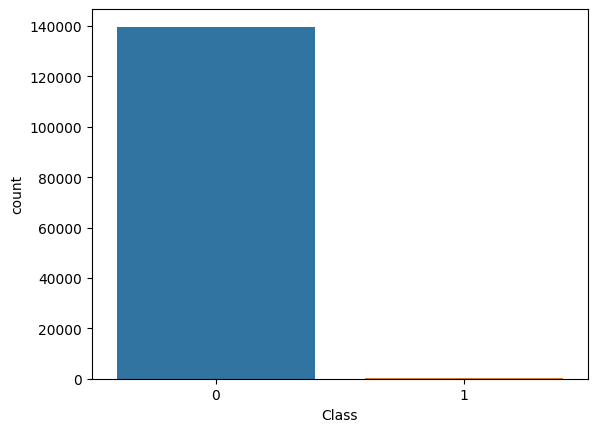

In [ ]:
sns.countplot(x='Class',data=transaction_data)

In [ ]:
transaction_data.describe()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
count,140000.000000,140000.000000,116232.000000,129731.000000,129693.000000,140000.000000,129678.000000,116529.000000,125595.000000,129645.000000,140000.000000,129891.000000,125695.000000,125833.000000,140000.000000
mean,105334.592698,71.102883,-13.647954,-15.797094,-16.141105,0.000037,-15.540173,-13.681959,-14.760374,-16.067148,0.000119,-16.029764,-15.500080,-15.491673,0.001807
std,52763.641695,212.359700,224.599903,72.631165,74.585111,0.031540,72.120519,230.871123,235.313604,73.148242,0.215636,73.378542,237.289210,236.485713,0.042472
min,0.000000,0.000000,-2000.000000,-500.000000,-500.000000,-0.212540,-500.000000,-2000.000000,-1999.000000,-500.000000,-1.544515,-500.000000,-1998.000000,-2000.000000,0.000000
25%,60107.500002,4.400000,-6.419730,-0.262951,-9.288367,-0.017731,-0.205542,-1.149444,-0.108129,-0.033800,-0.143551,-0.509781,-0.277642,-0.596404,0.000000
50%,94276.111110,17.584000,-1.250014,-0.019520,-1.739613,-0.000140,0.000903,0.279868,0.023023,-0.005629,0.003731,-0.062414,-0.019975,0.007491,0.000000
75%,154845.833375,61.522000,5.063801,0.220734,6.436411,0.017776,0.206203,1.092373,0.109777,0.022194,0.140835,0.327266,0.224548,0.507399,0.000000
max,191985.555600,20552.928000,2000.000000,100.000000,196.401291,0.278668,100.000000,1999.000000,1998.000000,100.000000,0.858579,100.000000,2000.000000,1999.000000,1.000000


In [ ]:
transaction_data.isnull().sum()

Timestamp        0
Value            0
C1           23768
C2           10269
C3           10307
C4               0
C5           10322
C6           23471
C7           14405
C8           10355
C9               0
C10          10109
C11          14305
C12          14167
Class            0
dtype: int64

In [ ]:
transaction_data = transaction_data.fillna(transaction_data.median())

In [ ]:
transaction_data.isnull().sum()

Timestamp    0
Value        0
C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
C9           0
C10          0
C11          0
C12          0
Class        0
dtype: int64

<AxesSubplot: >

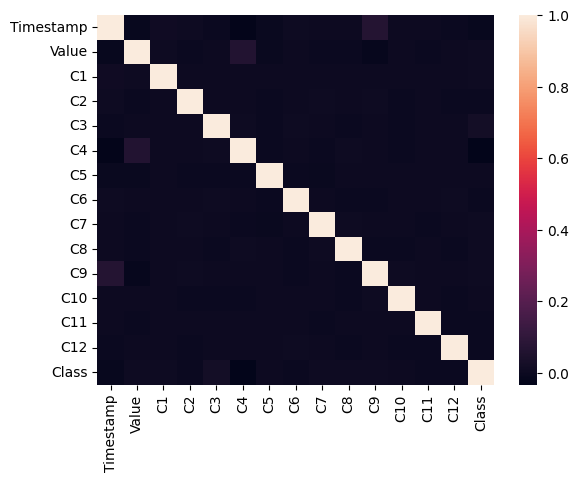

In [ ]:
sns.heatmap(transaction_data.corr())

In [ ]:
transaction_data.corr()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
Timestamp,1.000000,-0.010465,0.010990,0.004186,-0.001112,-0.026449,-0.005723,0.004022,0.001288,0.000226,0.067799,-0.000403,0.001204,-0.001168,-0.009994
Value,-0.010465,1.000000,0.006463,-0.001535,-0.000205,0.061557,-0.005582,0.000225,-0.001804,-0.003026,-0.014649,0.003132,-0.001535,0.003082,0.007095
C1,0.010990,0.006463,1.000000,0.002645,0.001899,0.000136,0.002116,0.001407,0.001284,0.002912,-0.000376,0.000773,0.000843,0.000137,0.007301
C2,0.004186,-0.001535,0.002645,1.000000,0.002597,0.001642,-0.001658,0.000866,0.004249,0.000065,0.004493,-0.000713,0.000900,-0.003174,-0.001013
C3,-0.001112,-0.000205,0.001899,0.002597,1.000000,0.005303,-0.001218,0.006360,0.001056,-0.001402,0.003368,-0.000885,0.002448,0.002028,0.023299
C4,-0.026449,0.061557,0.000136,0.001642,0.005303,1.000000,-0.003174,0.002643,-0.000741,0.003894,0.002401,-0.001671,0.000261,0.001615,-0.032692
C5,-0.005723,-0.005582,0.002116,-0.001658,-0.001218,-0.003174,1.000000,-0.001140,-0.005153,0.002597,0.000955,0.002331,0.002178,0.003266,0.002595
C6,0.004022,0.000225,0.001407,0.000866,0.006360,0.002643,-0.001140,1.000000,0.002850,-0.003772,-0.001691,-0.000009,0.001180,0.005680,-0.003851
C7,0.001288,-0.001804,0.001284,0.004249,0.001056,-0.000741,-0.005153,0.002850,1.000000,0.006721,0.003435,0.000374,-0.002095,0.000720,0.006152
C8,0.000226,-0.003026,0.002912,0.000065,-0.001402,0.003894,0.002597,-0.003772,0.006721,1.000000,-0.002122,-0.000996,0.002828,-0.000902,0.004237


In [ ]:
transaction_data['Class'].value_counts()

0    139747
1       253
Name: Class, dtype: int64

In [ ]:
Fraud = transaction_data[transaction_data['Class']==1]

Valid = transaction_data[transaction_data['Class']==0]

contamination = len(Fraud)/float(len(Valid))

In [ ]:
print(contamination)

print("Fraud Class : {}".format(len(Fraud)))

print("Normal Class : {}".format(len(Valid)))

0.0018104145348379571
Fraud Class : 253
Normal Class : 139747


In [ ]:
contamination

0.0018104145348379571

In [ ]:
X = transaction_data.drop('Class',axis=1)

In [ ]:
y = transaction_data['Class']

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

### Fitting the model and predicting with LOF with our contamination number

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.0018)

In [ ]:
y_pred = lof.fit_predict(X)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

### Converting Input dataframe into numpy array for the visualisation of outliers

In [ ]:
X_array = X.to_numpy()

In [ ]:
y_index = where(y_pred==-1)
outlier_values = X_array[y_index]


In [ ]:
outlier_values

array([[ 1.69492222e+05,  4.88000000e+00, -6.70446709e+00, ...,
        -9.44606319e-01, -1.99746360e-02, -7.34109907e-01],
       [ 4.19000000e+03,  2.16080000e+01, -3.09516211e+00, ...,
         3.47864085e-01, -1.07654152e-01,  7.38671894e-01],
       [ 1.00092222e+05,  7.53600000e+00, -1.92029472e+00, ...,
        -5.30354387e-01, -1.99746360e-02,  1.29300000e+03],
       ...,
       [ 1.60988889e+04,  1.27600000e+01, -9.40830258e+00, ...,
         4.12786320e-02,  1.13128618e-01, -1.40000000e+02],
       [ 1.90295556e+05,  2.17600000e+00,  6.16262999e+00, ...,
         3.20203631e-01, -1.99746360e-02, -6.86359270e-02],
       [ 2.21333333e+04,  9.48000000e+00, -1.25001363e+00, ...,
        -4.46196296e-01, -1.99746360e-02,  1.15791258e+00]])

### Plotting outliers and normal values

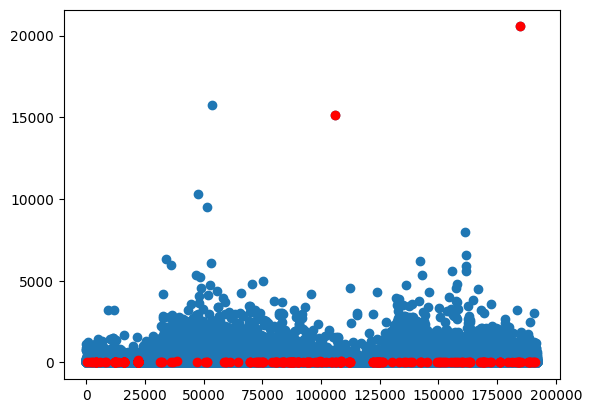

In [ ]:
plt.scatter(X_array[:,0], X_array[:,1])
plt.scatter(outlier_values[:,0],outlier_values[:,1], color='r')
plt.show()

### Fitting the model and predicting with LOF with default contamination number

In [ ]:
X = transaction_data.drop('Class',axis=1)
y = transaction_data['Class']

In [ ]:
lof = LocalOutlierFactor()

#### Here we will be deciding the threshold value and we will be selecting lowest 1 percent of score values as the anomalies.

In [ ]:
lof.fit_predict(X)
anomaly_scores = lof.negative_outlier_factor_ 


In [ ]:
anomaly_scores

array([-3.86741906, -1.22429401, -5.02413191, ..., -2.20988931,
       -0.9704086 , -1.04838918])

In [ ]:
threshold = quantile(anomaly_scores, .01)
print(threshold)

-5.88245676775076


In [ ]:
X_array =  X.to_numpy()

In [ ]:
index = where(anomaly_scores<=threshold)
outlier_values = X_array[index]

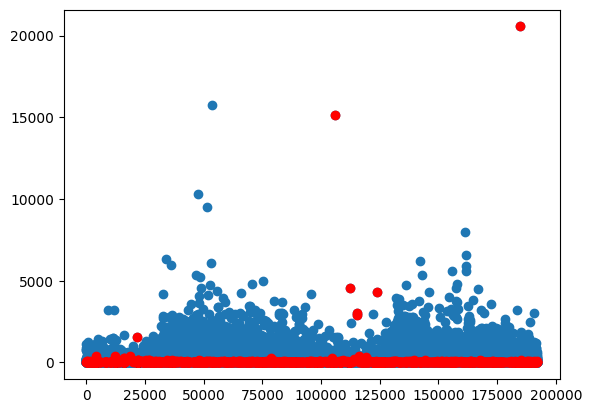

In [ ]:
plt.scatter(X_array[:,0], X_array[:,1])
plt.scatter(outlier_values[:,0], outlier_values[:,1], color='r')
plt.show()


# ----------------------------------THANK YOU-----------------------------------------------------------

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8dfd7a97-3da8-484d-816d-1dcc817bf5f7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>